# Car Price Prediction with Machine Learning

### 1. Problem Definition
The goal of this project is to predict car prices (MSRP) using vehicle technical specifications and brand information.


In [1]:
#Gerekli kütüphaleri yüklüyoruz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

### 2. Data Understanding

In [2]:
df = pd.read_csv("dataset1.xls")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 3. Data Preprocessing

In [3]:
# Veri setindeki eksik değerleri kontrol ediyoruz.
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
# Market Category sütununu siliyoruz.
df = df.drop("Market Category", axis=1)
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [5]:
#Boş verileri dolduruyoruz.
df["Engine Fuel Type"]=df["Engine Fuel Type"].fillna(
    df.groupby(["Make","Model","Engine HP","Engine Cylinders"])["Engine Fuel Type"].transform(lambda x: x.mode()[0]))
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

* Aracın markası veya üreticisi, Aracın modeli, Aracın motor gücü (beygir gücü, horsepower) ve Motorun silindir sayısı sütunlarına göre gruplama yapar.

* ['Engine Fuel Type'].transform(lambda x: x.mode()[0]): Her grup için Aracın yakıt türü sütununun en sık görülen (mode) değerini alır.

* fillna(...): Eksik (NaN) değerleri, gruplar için en sık görülen değerlerle doldurur.

In [6]:
df["Engine Cylinders"] = df["Engine Cylinders"].fillna(
    df.groupby(["Make","Vehicle Style","Vehicle Size"])["Engine Cylinders"].transform(lambda x: x.mode()[0]))
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

* Aracın markası veya üreticisi, Aracın kasa tipi, Aracın genel boyutu sütunlarına göre gruplama yaptık.

* Her grup için Motorun silindir sayısı sütununun en sık görülen (mode) değerini aldık.

In [7]:
df["Number of Doors"] = df["Number of Doors"].fillna(
    df.groupby(["Make","Model","Vehicle Size","Vehicle Style"])["Number of Doors"].transform(lambda x: x.mode()[0]))
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

* Aracın markası veya üreticisi, Aracın modeli, Aracın kasa tipi, Aracın genel boyutu sütunlarına göre gruplama yaptık.

* Her grup için Araçtaki kapı sayısı sütununun en sık görülen (mode) değerini aldık.

In [8]:
df["Engine HP"] = df["Engine HP"].fillna(df.groupby("Engine Cylinders")["Engine HP"].transform(lambda x: x.mode()[0]))
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

* Motorun silindir sayısı sütununa göre gruplama yaptık.

* Her grup için Aracın motor gücü (beygir gücü, horsepower) sütununun en sık görülen (mode) değerini aldık.

In [9]:
#df veri setindeki Engine HP (Motor Gücü) sütununa göre en yüksek motor gücüne sahip 10 markayı bulduk ve sıraladık.
yuksekmotor = df.groupby("Make")["Engine HP"].max().sort_values(ascending= False).reset_index().head(10)
yuksekmotor

,Make,Engine HP
0,Bugatti,1001.0
1,Lamborghini,750.0
2,Ferrari,731.0
3,Dodge,707.0
4,Ford,662.0
5,Chevrolet,650.0
6,McLaren,641.0
7,Mercedes-Benz,641.0
8,Cadillac,640.0
9,Maybach,631.0


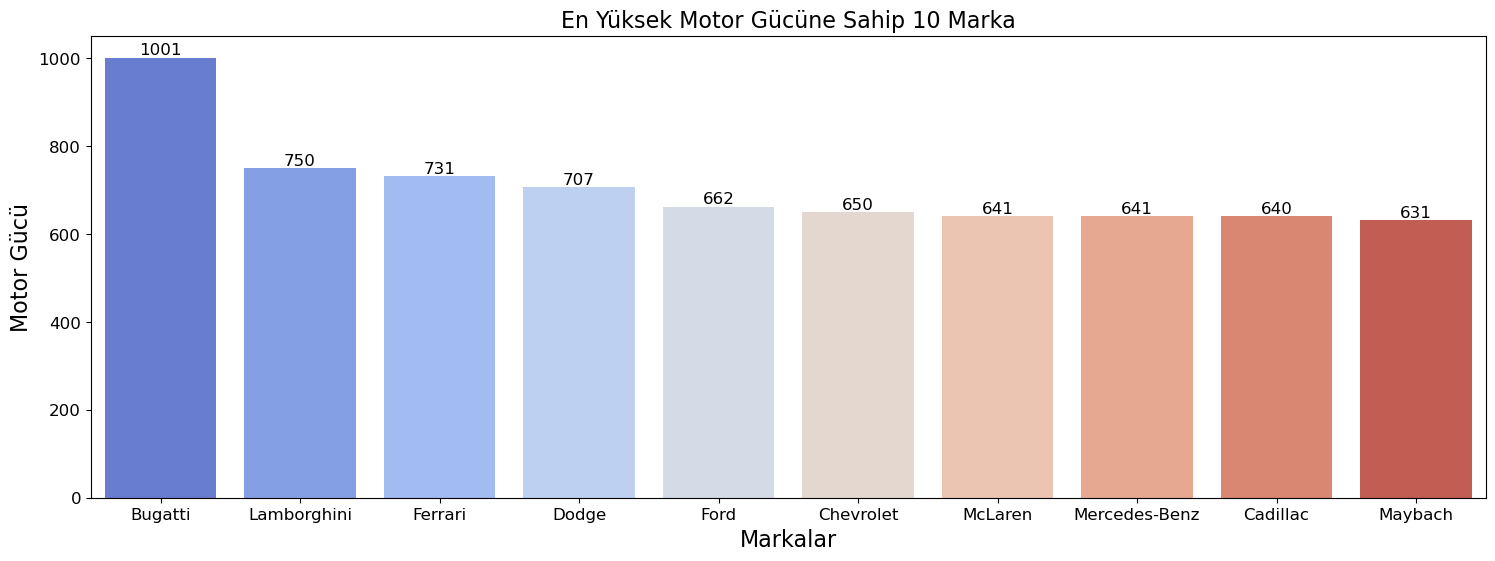

In [10]:
#yuksekMotor veri çerçevesindeki en yüksek motor gücüne sahip 10 markayı görselleştirmek için bir çubuk grafik oluşturduk.
plt.figure(figsize=(18,6))
fig = sns.barplot(x= "Make", y= "Engine HP", hue="Make", data = yuksekmotor, palette= "coolwarm")
plt.title('En Yüksek Motor Gücüne Sahip 10 Marka', fontsize = 16)
plt.xlabel('Markalar', fontsize = 16)
plt.ylabel('Motor Gücü', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for i in fig.containers:
    fig.bar_label(i , fontsize= 12)

plt.show()

In [11]:
#df veri setindeki Engine Cylinders (Motor Silindirleri) sütununa göre en yüksek silindir sayısına sahip 5 markayı bulduk ve sıraladık.
yukseksilindir = df.groupby("Make")["Engine Cylinders"].max().sort_values(ascending= False).reset_index().head(5)
yukseksilindir

,Make,Engine Cylinders
0,Bugatti,16.0
1,Rolls-Royce,12.0
2,Volkswagen,12.0
3,Aston Martin,12.0
4,Audi,12.0


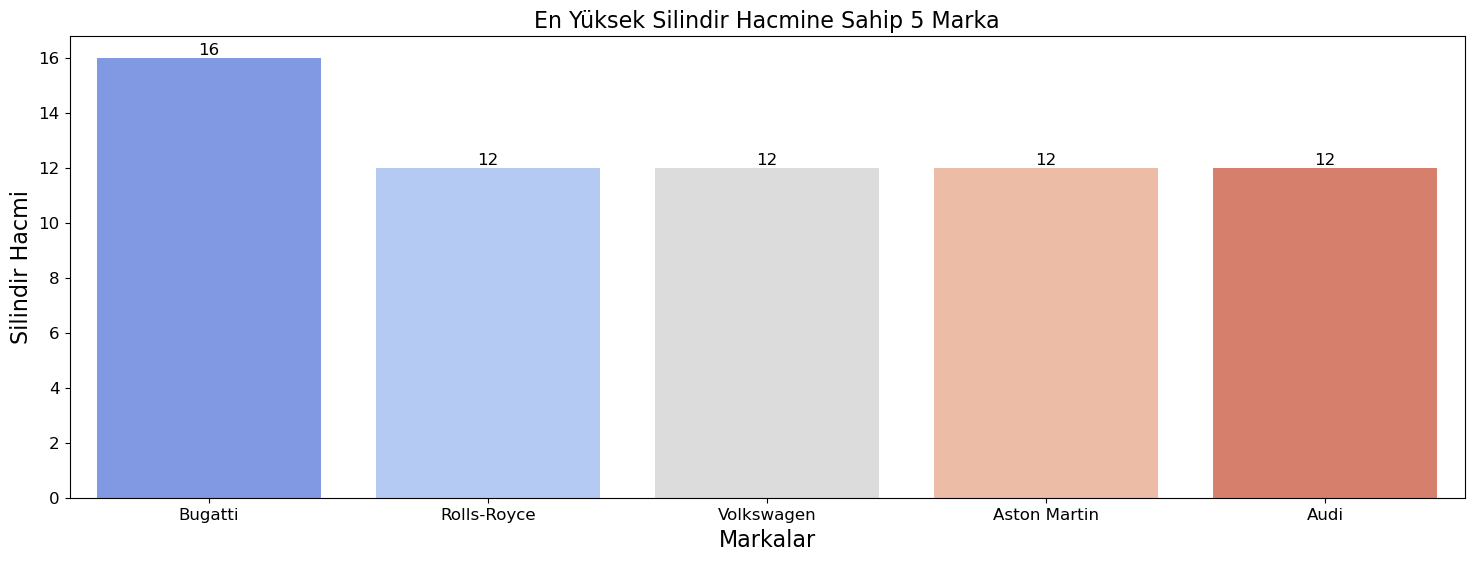

In [12]:
#yuksekSilindir veri çerçevesindeki en yüksek silindir hacmine sahip 5 markayı görselleştirmek için bir çubuk grafik oluşturduk.
plt.figure(figsize= (18,6))
fig = sns.barplot(x="Make", y="Engine Cylinders", hue="Make", data= yukseksilindir, palette= "coolwarm")
plt.title('En Yüksek Silindir Hacmine Sahip 5 Marka', fontsize = 16)
plt.xlabel('Markalar', fontsize = 16)
plt.ylabel('Silindir Hacmi', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for i in fig.containers:
    fig.bar_label(i, fontsize = 12)

plt.show()

### 4. Feature Engineering

In [13]:
# Kategorik Değişkenleri Sayısal Değerlere Çeviriyoruz
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [14]:
le = LabelEncoder()
df["Make"] = le.fit_transform(df["Make"])

In [15]:
df.Model.unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Acclaim'

In [16]:
df = df.drop("Model", axis= 1)

In [17]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [18]:
#araba veri setindeki Engine Fuel Type(Motor Yakıt Türü)sütunundaki değerleri daha anlaşılır ve standart hale getirmek için yeniden kodladık.
df['Engine Fuel Type'] = df['Engine Fuel Type'].map({"premium unleaded (required)": "Benzin",
                                                           "regular unleaded": "Benzin",
                                                          "premium unleaded (recommended)": "Benzin",
                                                          "flex-fuel (unleaded/E85)": "Benzin-E85",
                                                           "diesel": "Diesel",
                                                           "electric": "Elektrik",
                                                          "flex-fuel (premium unleaded recommended/E85)": "Benzin-E85",
                                                           "natural gas": "CNG",
                                                           "lex-fuel (premium unleaded required/E85)": "Benzin-E85",
                                                          "flex-fuel (unleaded/natural gas)": "Benzin-LPG"})

In [19]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,2011,Benzin,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,4,2011,Benzin,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,4,2011,Benzin,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,4,2011,Benzin,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,4,2011,Benzin,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,2012,Benzin,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,0,2012,Benzin,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,0,2012,Benzin,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,0,2013,Benzin,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [20]:
df["Engine Fuel Type"] = le.fit_transform(df["Engine Fuel Type"])

In [21]:
df["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [22]:
#Transmission Type (Şanzıman Türü) sütununda "UNKNOWN" (Bilinmeyen) değerlerini eksik (NaN) değerlerle değiştirdik.
df["Transmission Type"] = df["Transmission Type"].replace("UNKNOWN", pd.NA)

In [23]:
df["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE', <NA>],
      dtype=object)

In [24]:
df.isnull().sum()

Make                  0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders      0
Transmission Type    19
Driven_Wheels         0
Number of Doors       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [25]:
df["Transmission Type"] = df["Transmission Type"].fillna(
    df.groupby(["Make","Vehicle Size","Vehicle Style"])["Transmission Type"].transform(lambda x: x.mode()[0]))
df.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

* Aracın markası veya üreticisi, Aracın kasa tipi, Aracın genel boyutu sütunlarına göre gruplama yaptık.

* Her grup için Aracın şanzıman türü sütununun en sık görülen (mode) değerini aldık.

In [26]:
df["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE'],
      dtype=object)

In [27]:
df["Transmission Type"] = le.fit_transform(df["Transmission Type"])

In [28]:
df["Driven_Wheels"].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [29]:
df["Driven_Wheels"] = le.fit_transform(df["Driven_Wheels"])

In [30]:
df["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [31]:
df["Vehicle Size"] = df["Vehicle Size"].map({"Compact": 0,
                                            "Midsize": 1,
                                            "Large":2})

In [32]:
df["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [33]:
df["Vehicle Style"] = le.fit_transform(df["Vehicle Style"])

In [34]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,2011,0,335.0,6.0,3,3,2.0,0,8,26,19,3916,46135
1,4,2011,0,300.0,6.0,3,3,2.0,0,6,28,19,3916,40650
2,4,2011,0,300.0,6.0,3,3,2.0,0,8,28,20,3916,36350
3,4,2011,0,230.0,6.0,3,3,2.0,0,8,28,18,3916,29450
4,4,2011,0,230.0,6.0,3,3,2.0,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,2012,0,300.0,6.0,1,0,4.0,1,2,23,16,204,46120
11910,0,2012,0,300.0,6.0,1,0,4.0,1,2,23,16,204,56670
11911,0,2012,0,300.0,6.0,1,0,4.0,1,2,23,16,204,50620
11912,0,2013,0,300.0,6.0,1,0,4.0,1,2,23,16,204,50920


<Axes: xlabel='Make'>

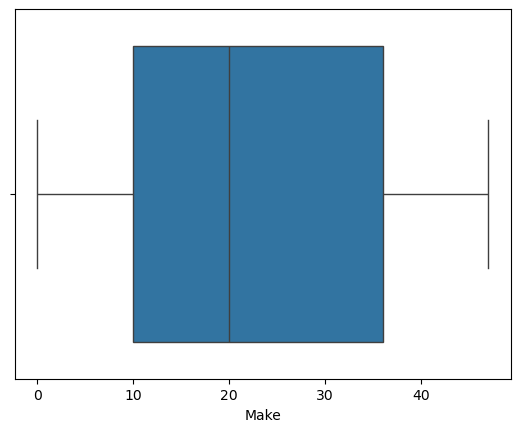

In [35]:
# Aykırı Değerleri Tespit Ediyoruz
sns.boxplot(x="Make", data=df)

<Axes: xlabel='Engine HP'>

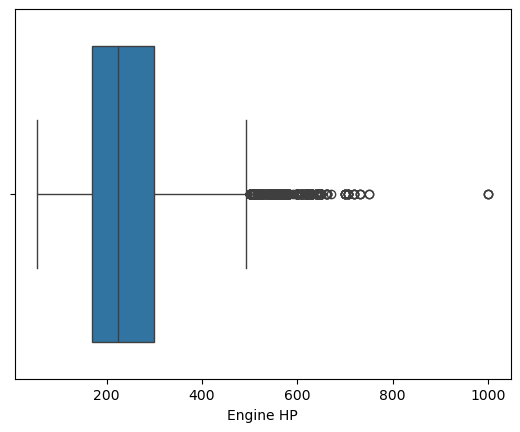

In [36]:
sns.boxplot(x="Engine HP", data= df)

In [37]:
for sutun in df.columns:
    Q1 = df[sutun].quantile(0.25)
    Q3 = df[sutun].quantile(0.75)
    IQR = Q3 - Q1
    AltSinir = Q1 - 1.5 * IQR
    UstSinir = Q3 + 1.5 * IQR
    
    df[sutun] = np.where(df[sutun] > UstSinir, UstSinir, df[sutun])
    df[sutun] = np.where(df[sutun] < AltSinir, AltSinir, df[sutun])


<Axes: xlabel='Engine HP'>

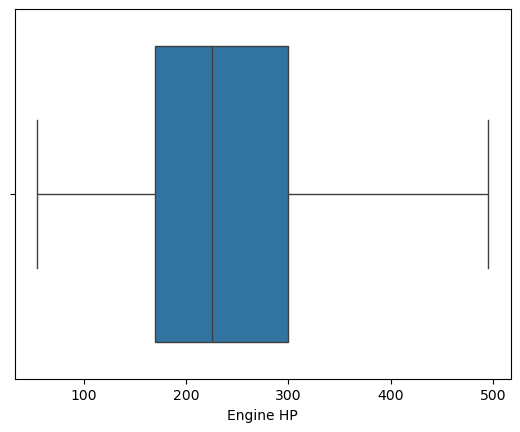

In [38]:
sns.boxplot(x="Engine HP", data= df)

In [39]:
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df)

In [40]:
df

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0.085106,0.744681,0.0,0.636364,0.625,1.000000,1.000000,0.0,0.0,0.533333,0.466667,0.500000,0.932571,0.612322
1,0.085106,0.744681,0.0,0.556818,0.625,1.000000,1.000000,0.0,0.0,0.400000,0.533333,0.500000,0.932571,0.536224
2,0.085106,0.744681,0.0,0.556818,0.625,1.000000,1.000000,0.0,0.0,0.533333,0.533333,0.541667,0.932571,0.476566
3,0.085106,0.744681,0.0,0.397727,0.625,1.000000,1.000000,0.0,0.0,0.533333,0.533333,0.458333,0.932571,0.380837
4,0.085106,0.744681,0.0,0.397727,0.625,1.000000,1.000000,0.0,0.0,0.400000,0.533333,0.458333,0.932571,0.450900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0.000000,0.787234,0.0,0.556818,0.625,0.333333,0.000000,1.0,0.5,0.133333,0.366667,0.375000,0.048130,0.612114
11910,0.000000,0.787234,0.0,0.556818,0.625,0.333333,0.000000,1.0,0.5,0.133333,0.366667,0.375000,0.048130,0.758483
11911,0.000000,0.787234,0.0,0.556818,0.625,0.333333,0.000000,1.0,0.5,0.133333,0.366667,0.375000,0.048130,0.674546
11912,0.000000,0.829787,0.0,0.556818,0.625,0.333333,0.000000,1.0,0.5,0.133333,0.366667,0.375000,0.048130,0.678708


### 5. Model Training

In [41]:
# Bağımsız değişkenler (özellikler) ve bağımlı değişken (hedef) seçelim
X = df.drop("MSRP", axis= 1)
y = df["MSRP"]

# Veri setini eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modeli oluştur ve eğit
model = DecisionTreeRegressor(max_depth=4 , random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 0.01
R² Skoru: 0.86


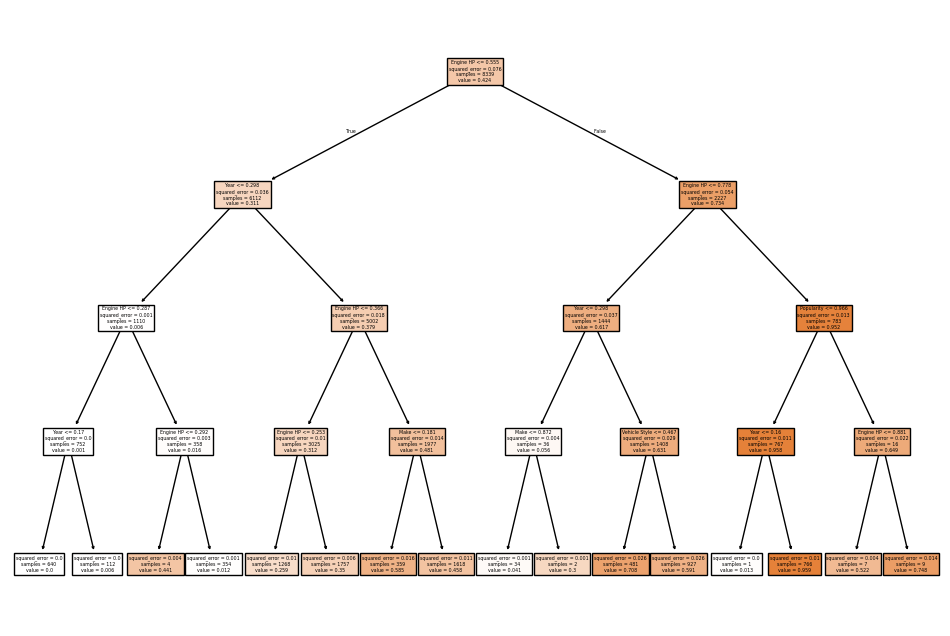

In [42]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R² hesaplama
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.2f}")

# Karar ağacı yapısını görselleştir
plt.figure(figsize= (12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [43]:
# Random Forest modeli oluştur ve eğit
rf = RandomForestRegressor( n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tahmin yap ve performansı değerlendir
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.00
R-squared (R2): 0.97


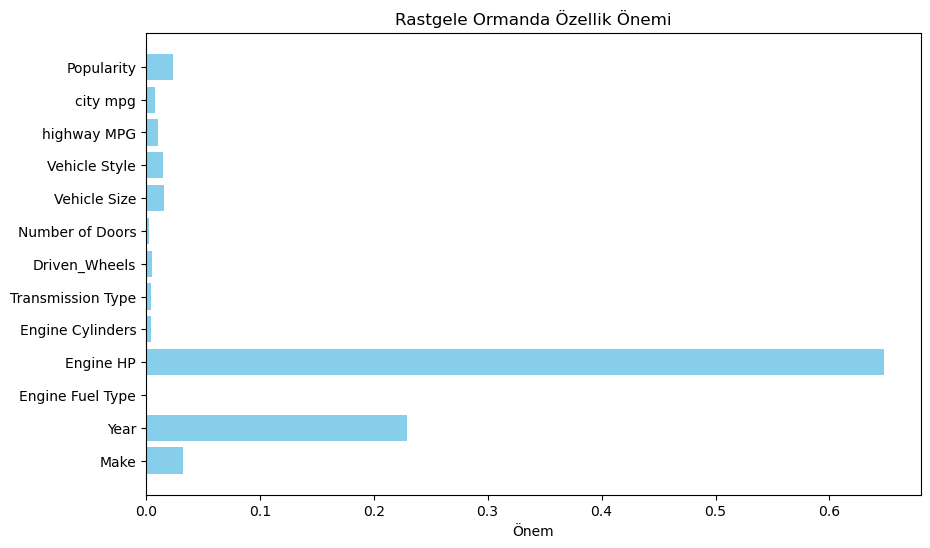

In [44]:
# Özellik önemini görselleştir
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize = (10, 6))
plt.barh(features, feature_importances, color= "skyblue")
plt.title("Rastgele Ormanda Özellik Önemi")
plt.xlabel("Önem")
plt.show()

In [45]:
# Bağımsız değişkenler (özellikler) ve bağımlı değişken (hedef) seçelim
X = df.drop(['Number of Doors', 'Driven_Wheels', 'Transmission Type', 'Engine Cylinders','Engine Fuel Type', 'MSRP'], axis=1)
y = df["MSRP"]

# Veri setini eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modeli oluştur ve eğit
model = DecisionTreeRegressor(max_depth= 4, random_state= 42)
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 0.01
R² Skoru: 0.86


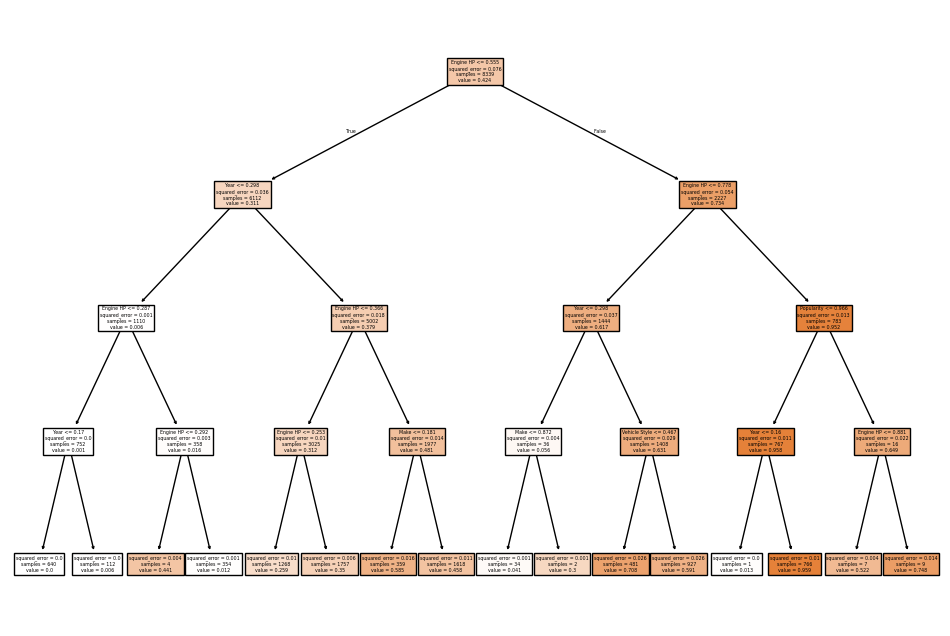

In [46]:
# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R² hesaplama
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.2f}")

# Karar ağacı yapısını görselleştir
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [47]:
# Random Forest modeli oluştur ve eğit
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tahmin yap ve performansı değerlendir
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.00
R-squared (R2): 0.97


In [48]:
# Bu kod parçası, farklı ağaç derinlikleri için bir Random Forest modelinin performansını değerlendirir
for depth in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
    rf = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Ağaç derinliği: {depth},\t Mean Squared Error (MSE): {mse:.2f} \t Test R^2: {r2:.2f}")

Ağaç derinliği: 4,	 Mean Squared Error (MSE): 0.01 	 Test R^2: 0.87
Ağaç derinliği: 5,	 Mean Squared Error (MSE): 0.01 	 Test R^2: 0.89
Ağaç derinliği: 6,	 Mean Squared Error (MSE): 0.01 	 Test R^2: 0.91
Ağaç derinliği: 7,	 Mean Squared Error (MSE): 0.01 	 Test R^2: 0.92
Ağaç derinliği: 8,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.94
Ağaç derinliği: 9,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.95
Ağaç derinliği: 10,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.96
Ağaç derinliği: 11,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç derinliği: 12,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97


In [49]:
#farklı ağaç sayıları için bir Random Forest modelinin performansını değerlendirir
for agac in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    rf = RandomForestRegressor(n_estimators=agac, max_depth=11, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Ağaç Sayısı: {agac},\t Mean Squared Error (MSE): {mse:.2f} \t Test R^2: {r2:.2f}")

Ağaç Sayısı: 100,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 150,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 200,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 250,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 300,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 350,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 400,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 450,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97
Ağaç Sayısı: 500,	 Mean Squared Error (MSE): 0.00 	 Test R^2: 0.97


### 6. Model Evaluation

In [50]:
# Model gerçekten ezberliyor mu?
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.9781317541391401
Test R²: 0.9677199829070927


In [51]:
# En önemli özellikleri yorumlayalım
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

importances.head(10)

Engine HP        0.660464
Year             0.230830
Make             0.035308
Popularity       0.023647
Vehicle Size     0.017612
Vehicle Style    0.015519
highway MPG      0.010030
city mpg         0.006590
dtype: float64

In [52]:
# Model HP olmadan da fiyatı iyi tahmin edebiliyor mu?
X2 = X.drop("Engine HP", axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y, test_size=0.3, random_state=42)

rf2 = RandomForestRegressor( n_estimators=100, max_depth=11, random_state=42)

rf2.fit(X2_train, y2_train)

y2_pred = rf2.predict(X2_test)

r2_new = r2_score(y2_test, y2_pred)

print(f"R² Skoru (HP çıkarıldı): {r2_new:.2f}")

R² Skoru (HP çıkarıldı): 0.94


* Engine HP güçlü bir değişken olmasına rağmen, model HP olmadan da yüksek açıklayıcılık göstermiştir. Bu durum modelin fiyat bilgisini yalnızca motor gücüne dayandırmadığını ve yapısal olarak sağlam olduğunu göstermektedir.

### 7. Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score( rf, X, y, cv=5, scoring="r2")

print("Cross-validation R² Skoru:", cv_scores)
print("Ortalama CV R²:", cv_scores.mean())

Cross-validation R² Skoru: [0.87444367 0.87588849 0.83477859 0.90338145 0.84698439]
Ortalama CV R²: 0.8670953179011068


* Beş katlı çapraz doğrulama sonuçları, modelin farklı veri bölümlerinde tutarlı ve yüksek açıklayıcılık sergilediğini göstermektedir. Ortalama R² değerinin 0.867 olması, modelin genelleme kabiliyetinin güçlü olduğunu ve aşırı öğrenme probleminin sınırlı düzeyde kaldığını ortaya koymaktadır.